<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Linear_regression_prak7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Impor library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import dataset
dataset = pd.read_csv('/content/Daftar_gaji.csv')
print(dataset.tail())

    Tahun_bekerja    Gaji
25            9.0  105582
26            9.5  116969
27            9.6  112635
28           10.3  122391
29           10.5  121872


In [3]:
#untuk melihat ukuran data
dataset.shape

(30, 2)

In [4]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tahun_bekerja  30 non-null     float64
 1   Gaji           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
dataset.describe()

,Tahun_bekerja,Gaji
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


**Catatan nilai kuartil pada 25 %, 50 % dan 75 %**
- Kuartil pertama disebut sebagai Q1 atau kuartil bawah. Nilai ini merupakan persentil ke-25, yang mana seperempat nilainya berada di
bawah persentil ke-25 dan tiga perempatnya berada di atasnya.
- Kuartil kedua, atau Q2, adalah nilai pada persentil ke-50. Ini adalah median dari kumpulan data.
- Q3, kuartil ketiga, disebut sebagai 'kuartil atas' dan merupakan nilai persentil ke-75, artinya hanya 25% nilai dalam himpunan yang berada
di atas nilai ini.

In [6]:
#Mencari dan menangani missing values.
#Ternyata data kita tidak ada missing values.
dataset.isnull().sum()

,0
Tahun_bekerja,0
Gaji,0


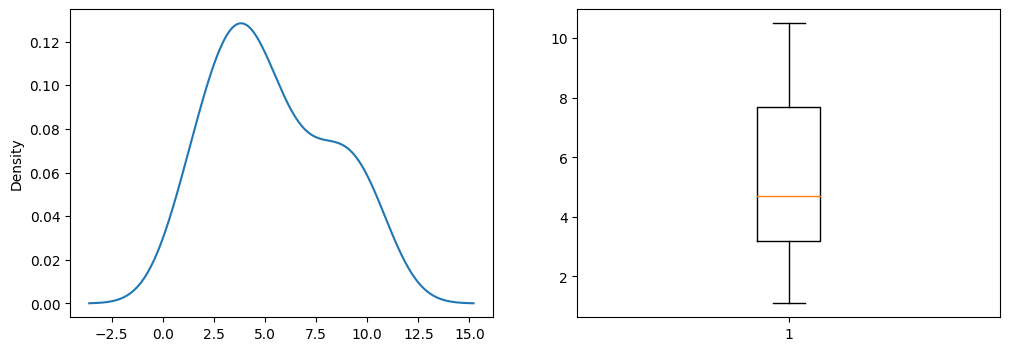

In [7]:
#Melakukan Exploratory Data Analysis (EDA)
#Univariate analysis Tahun_bekerja.
#Melihat distribusi dari Tahun_bekerja.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Tahun_bekerja'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Tahun_bekerja'])
plt.show()

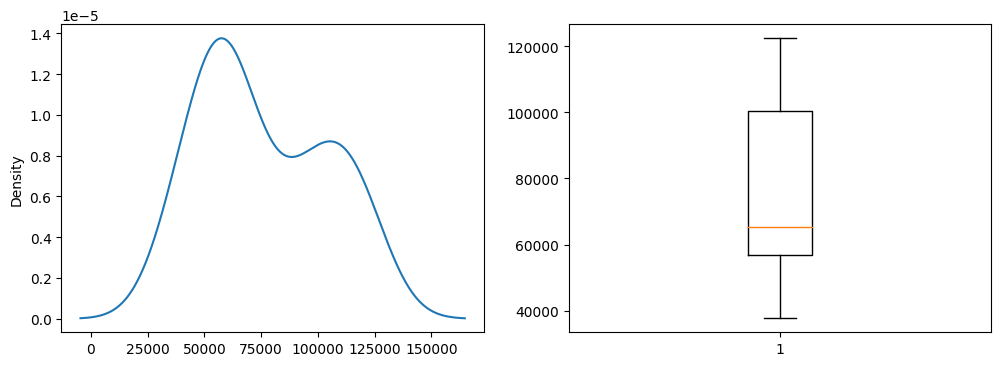

In [8]:
#Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.
#Univariate analysis Gaji.
#Melihat distribusi dari Gaji.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
dataset['Gaji'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(dataset['Gaji'])
plt.show()

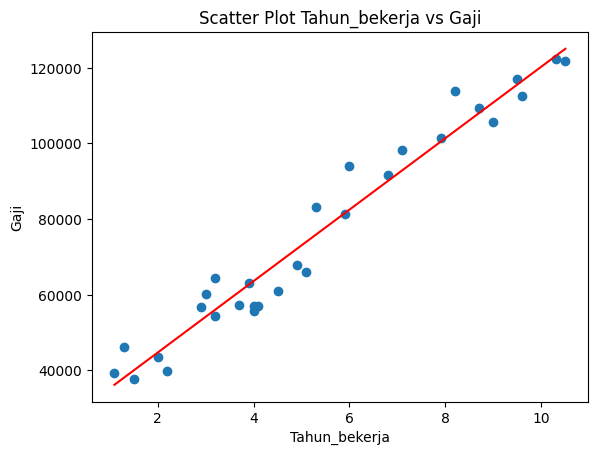

In [9]:
# Bivariate analysis Tahun_bekerja dan Gaji.
# Menggunakan scatter plot.
plt.scatter(dataset['Tahun_bekerja'], dataset['Gaji'])
plt.xlabel('Tahun_bekerja')
plt.ylabel('Gaji')
plt.title('Scatter Plot Tahun_bekerja vs Gaji')
# Add a straight line to the plot
x = np.linspace(dataset['Tahun_bekerja'].min(), dataset['Tahun_bekerja'].max(), 100) # Create x values for the line
# Calculate corresponding y-values using linear regression (example)
# Replace this with your actual regression model if you have one
m, b = np.polyfit(dataset['Tahun_bekerja'], dataset['Gaji'], 1) # Find the slope (m) and y-intercept (b)
y = m * x + b
plt.plot(x, y, color='red') # Plot the line

In [10]:
#Mengetahui nilai korelasi dari Tahun_bekerja dan Gaji.
dataset.corr()

,Tahun_bekerja,Gaji
Tahun_bekerja,1.000000,0.978242
Gaji,0.978242,1.000000


In [11]:
#ambil konten data saja, buang header nya
#X sebagai variabel indepedent/variable bebas/variabel independent/ predictor, yakni Tahun bekerja
X = dataset.iloc[:, :-1].values
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [12]:
#ambil konten data saja, buang header nya
#Y sebagai variabel dependent/variable terikat/variabel tak bebas/ response, yakni Gaji
Y = dataset.iloc[:, 1].values
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [13]:
# Membagi data menjadi Training Set dan Test Set
# import sckit learn untuk Machine Learning
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_train)

(21, 1)
[[ 7.9]
 [ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]


In [14]:
# panggil modul LinearRegression untuk menjalankan regresi liear
from sklearn.linear_model import LinearRegression
# membuat objek regresi linear
lin_reg = LinearRegression()
# membangun model (training model dari data set yang sudah kita split)
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [15]:
# cari tau nilai slope/koefisien (θi ) dan intercept (θ0).
# ŷ=θ0+θiΧi+Ɛi
print(lin_reg.coef_)
print(lin_reg.intercept_)

[9360.26128619]
26777.391341197625


In [16]:
# tampikan persamaan regresi liniernya
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
# Access the coefficients and intercept
slope = lin_reg.coef_[0]
intercept = lin_reg.intercept_
# Print the linear regression equation
print(f"Linear Regression Equation: Gaji = {slope:.2f} * Tahun_bekerja + {intercept:.2f}")

Linear Regression Equation: Gaji = 9360.26 * Tahun_bekerja + 26777.39


In [17]:
# memprediksi model dengan test set(melakukan proses testing)
Y_prediksi = lin_reg.predict(X_test)

In [18]:
#Lakukan evaluasi performa
#tampilkan hasil dari data aktual dan data prediksi
df = pd.DataFrame({'aktual': Y_test, 'Prediksi': Y_prediksi})
print(df)

   aktual       Prediksi
0   37731   40817.783270
1  122391  123188.082589
2   57081   65154.462615
3   63218   63282.410357
4  116969  115699.873560
5  109431  108211.664531
6  112635  116635.899689
7   55794   64218.436486
8   83088   76386.776158


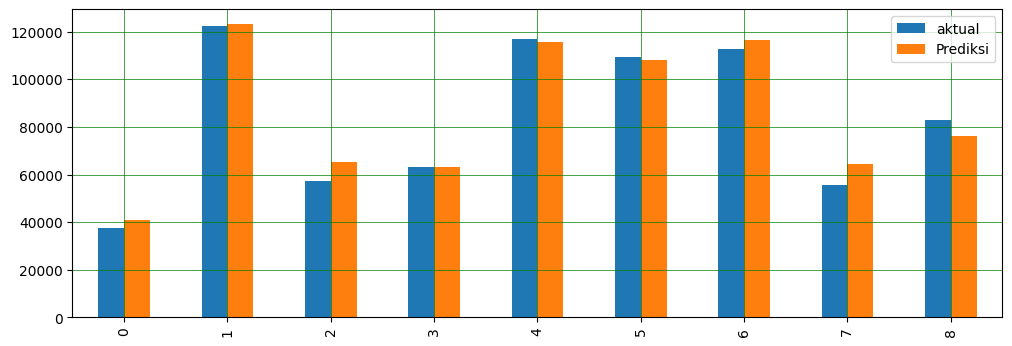

In [19]:
#visualisasi galat/ selisih data aktual dengan data prediksi
df.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [20]:
#melakukan evaluasi/ pengukuran performa algoritma
#menghitung nilai MAE, MSE dan RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_prediksi))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_prediksi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_prediksi)))

Mean Absolute Error: 3737.417861878896
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728


Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja (training set)')

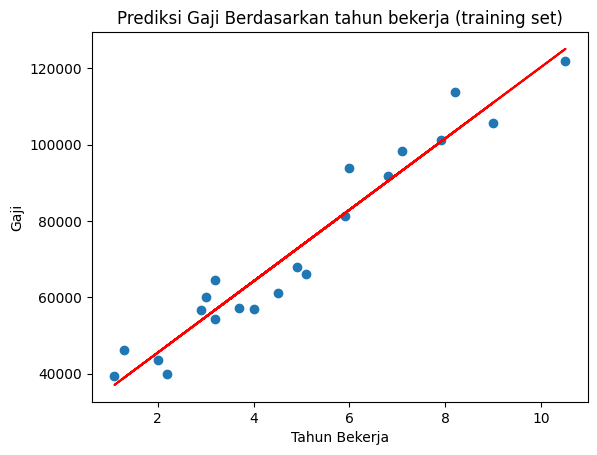

In [21]:
#visualisasi data training
plt.scatter(X_train, Y_train)
plt.plot(X_train, lin_reg.predict(X_train), c='red')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja (training set)')

Text(0.5, 1.0, 'Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

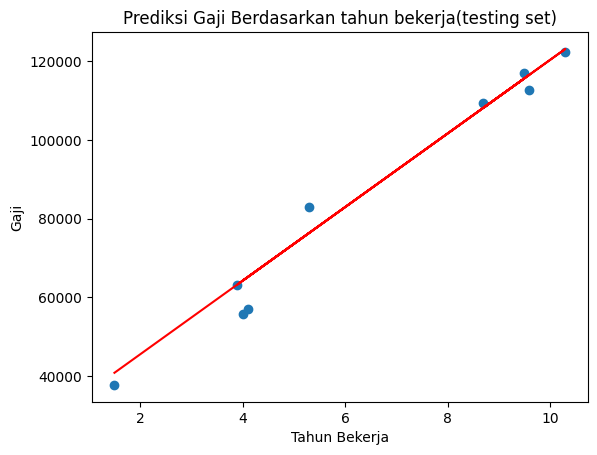

In [22]:
#visualisasi data dari data testing
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_prediksi, c='r')
plt.xlabel('Tahun Bekerja')
plt.ylabel('Gaji')
plt.title('Prediksi Gaji Berdasarkan tahun bekerja(testing set)')

In [23]:
# mencoba studi kasus, misal kita prediksi gaji seseorang yang telah bekerja selama 2.7, 5.5, 7.5 tahun
print('Gaji Seseorang setelah bekerja selama 2.7 tahun adalah',lin_reg.predict([[2.7]]))
print('Gaji Seseorang setelah bekerja selama 5.5 tahun adalah',lin_reg.predict([[5.5]]))
print('Gaji Seseorang setelah bekerja selama 7.5 tahun adalah',lin_reg.predict([[7.5]]))

Gaji Seseorang setelah bekerja selama 2.7 tahun adalah [52050.09681392]
Gaji Seseorang setelah bekerja selama 5.5 tahun adalah [78258.82841526]
Gaji Seseorang setelah bekerja selama 7.5 tahun adalah [96979.35098765]


In [24]:
dataset = pd.read_csv('/content/data.csv')
print(dataset.head())

          Car       Model  Volume  Weight  CO2
0      Toyoty        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105


In [25]:
#mendefinisikan nilai independen dan beri nama variabel ini X dan nilai dependen ke dalam variabel bernama y
X = dataset[['Weight', 'Volume']]
y = dataset['CO2']

In [26]:
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

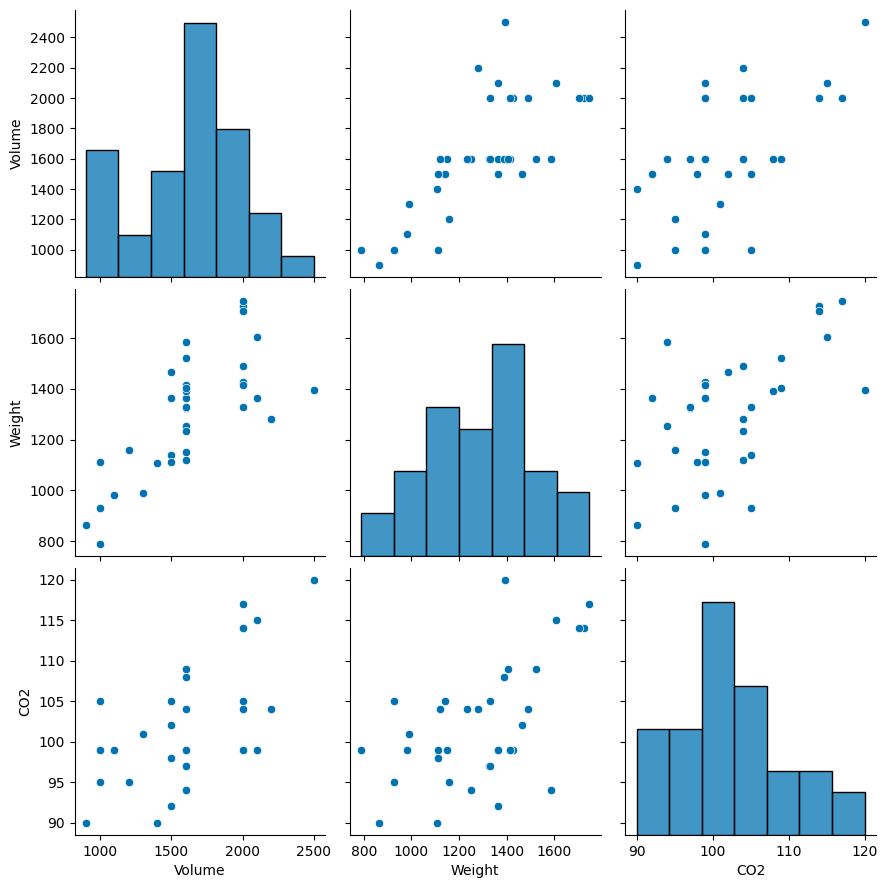

In [27]:
# Visualize dengan scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=dataset, height=3)

In [28]:
# Ensure X and y have consistent number of samples
X = dataset[['Weight', 'Volume']] # Assuming dataset has 100 rows
y = dataset['CO2']

In [29]:
# Verify the shapes of X and y
print(X.shape)
print(y.shape)
# Proceed with model fitting if shapes are consistent
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model=regr.fit(X, y)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(36, 2)
(36,)
Intercept: 79.69471929115939
Coefficients: [0.00755095 0.00780526]


In [30]:
#memprediksi hasil model
#misalkan memprediksi emisi CO2 sebuah mobil yang beratnya 2300 dan volumenya 1300
predictedCO2 = regr.predict([[2300, 1300]])
print('hasil prediksi', predictedCO2)

hasil prediksi [107.2087328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Tugas
1. Terapkan metode linear regression dengan menggunakan dataset StudentPerformance-2.csv

2. Gunakan sepasang kolom dengan korelasi tertinggi untuk dibuat nilai prediksinya --> harus di cari dengan model tidak selera masing-
masing

3. Berikan analisis dan kesimpulan untuk hasilnya

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
# Load dataset
file_path = '/content/StudentPerformance-2.csv'
data = pd.read_csv(file_path)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

In [49]:
data.describe()

,id_mhs,umur,uang_saku,paket_data,ip_sem1,ip_sem2,ip_sem3,ip_sem4,persentase_presensi,durasi_sosmed (jam/hari),jumlah_akun_sosmed,jumlah_org,score_toefl,jumlah_lomba,ukuran_sepatu,tinggi_badan,berat_badan,ipk
count,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,150.000000,150.000000,150.0000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000
mean,75.500000,23.693333,7.813333e+05,115633.333333,3.496000,3.484667,3.469333,3.525267,63.3200,4.880000,3.173333,2.066667,69.713333,0.686667,38.12000,165.993333,59.440000,3.496133
std,43.445368,2.567078,3.765592e+05,48081.644304,0.340771,0.303002,0.320381,0.321452,20.1632,2.240326,1.349853,0.945968,24.724071,1.326734,3.66357,14.033754,3.360709,0.159499
min,1.000000,19.000000,2.000000e+05,40000.000000,3.000000,3.000000,3.000000,3.000000,40.0000,1.000000,1.000000,0.000000,40.000000,0.000000,32.00000,140.000000,51.800000,3.130000
25%,38.250000,22.000000,5.000000e+05,70000.000000,3.200000,3.200000,3.200000,3.200000,47.2500,3.000000,2.000000,2.000000,49.250000,0.000000,35.00000,154.000000,56.975000,3.400000
50%,75.500000,24.000000,8.000000e+05,120000.000000,3.500000,3.500000,3.450000,3.600000,54.0000,5.000000,3.000000,2.000000,61.000000,0.000000,38.00000,166.500000,59.700000,3.500000
75%,112.750000,26.000000,1.100000e+06,150000.000000,3.800000,3.787500,3.787500,3.800000,87.0000,7.000000,4.000000,3.000000,95.000000,0.750000,41.00000,178.000000,62.100000,3.600000
max,150.000000,27.000000,1.400000e+06,200000.000000,4.000000,4.000000,4.000000,4.000000,100.0000,8.000000,5.000000,3.000000,120.000000,4.000000,44.00000,190.000000,67.200000,3.960000


In [50]:
numerical_data = data.select_dtypes(include=[np.number])

In [51]:
# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

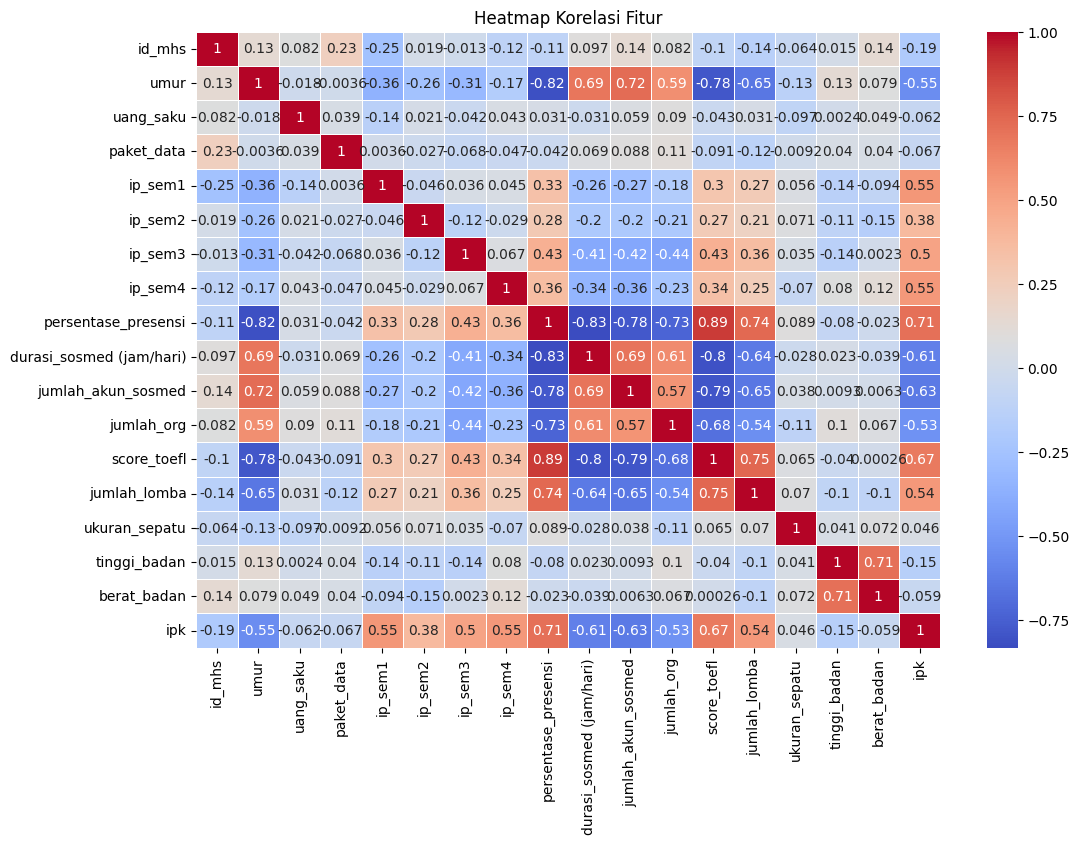

In [52]:
# Visualisasi Heatmap Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [53]:
# Menghitung pasangan dengan korelasi tertinggi
correlation_matrix_unstacked = correlation_matrix.unstack()
correlation_matrix_unstacked = correlation_matrix_unstacked[correlation_matrix_unstacked.index.get_level_values(0) != correlation_matrix_unstacked.index.get_level_values(1)]
pasangan_tertinggi = correlation_matrix_unstacked.idxmax()

In [54]:
# Memilih kolom dengan korelasi tertinggi
kolom_x, kolom_y = pasangan_tertinggi
X = numerical_data[[kolom_x]]
y = numerical_data[kolom_y]

In [55]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Menerapkan Regresi Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [57]:
# Mari Prediksi
y_pred = model.predict(X_test)

In [58]:
# Menghitung dan mencetak Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 165.22092007059203


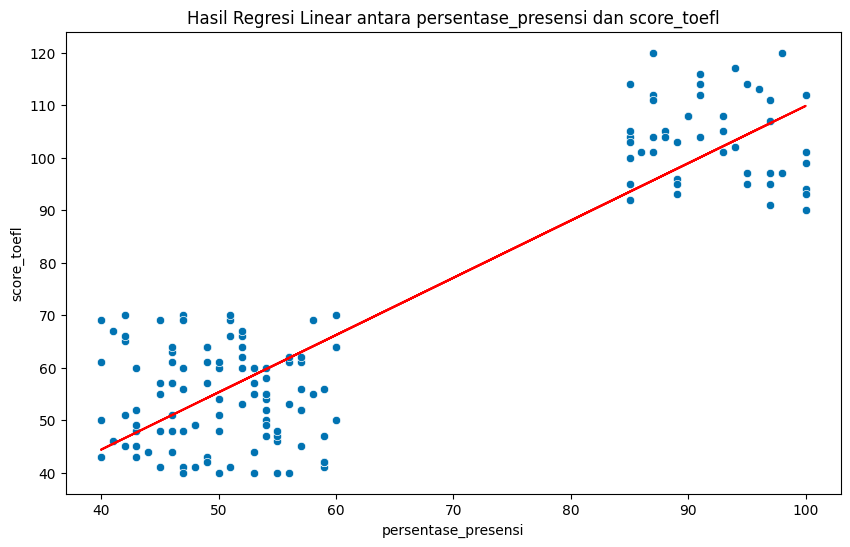

In [59]:
# Visualisasi Hubungan antara Fitur dengan Korelasi Tertinggi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.squeeze(), y=y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel(kolom_x)
plt.ylabel(kolom_y)
plt.title(f'Hasil Regresi Linear antara {kolom_x} dan {kolom_y}')
plt.show()

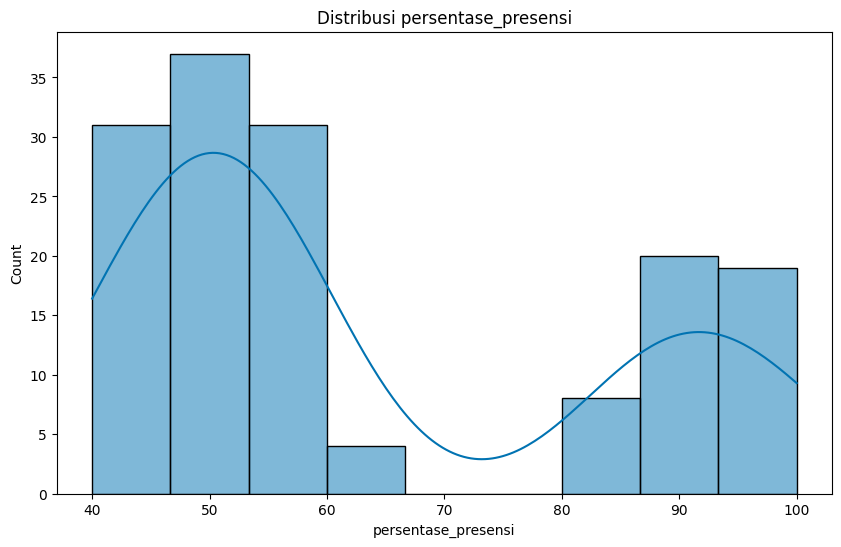

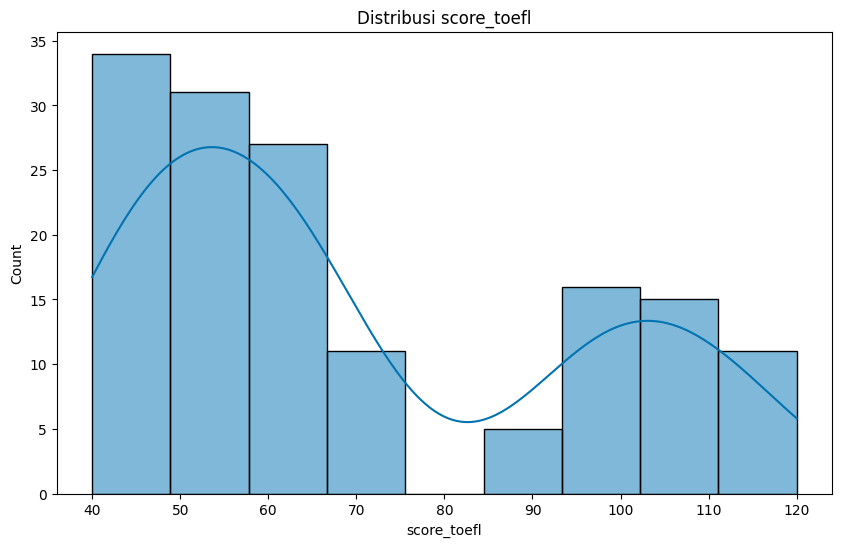

In [60]:
# Visualisasi distribusi dari kolom yang dipilih
plt.figure(figsize=(10, 6))
sns.histplot(data[kolom_x], kde=True)
plt.title(f'Distribusi {kolom_x}')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data[kolom_y], kde=True)
plt.title(f'Distribusi {kolom_y}')
plt.show()

# **Coba lagi, masi jelek**

In [82]:
df = pd.read_csv('/content/StudentPerformance-2.csv')

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_mhs                    150 non-null    int64  
 1   nama                      150 non-null    object 
 2   jenis_kelamin             150 non-null    object 
 3   umur                      150 non-null    int64  
 4   jurusan                   150 non-null    object 
 5   konsentrasi               150 non-null    object 
 6   asal                      150 non-null    object 
 7   kos                       150 non-null    object 
 8   uang_saku                 150 non-null    int64  
 9   paket_data                150 non-null    int64  
 10  kendaraan                 150 non-null    object 
 11  laptop                    150 non-null    object 
 12  tipe_laptop               150 non-null    object 
 13  status_menikah            150 non-null    object 
 14  ip_sem1   

In [65]:
print(df.isnull().sum())

id_mhs                      0
nama                        0
jenis_kelamin               0
umur                        0
jurusan                     0
konsentrasi                 0
asal                        0
kos                         0
uang_saku                   0
paket_data                  0
kendaraan                   0
laptop                      0
tipe_laptop                 0
status_menikah              0
ip_sem1                     0
ip_sem2                     0
ip_sem3                     0
ip_sem4                     0
persentase_presensi         0
kacamata                    0
gamer                       0
durasi_sosmed (jam/hari)    0
jumlah_akun_sosmed          0
clubbing                    0
jumlah_org                  0
score_toefl                 0
jumlah_lomba                0
keadaan_ortu_divorced       0
romance                     0
ukuran_sepatu               0
tinggi_badan                0
berat_badan                 0
ipk                         0
lulus_tepa

In [66]:
df_numerik = df.select_dtypes(include=['int64', 'float64'])

In [67]:
# Menghitung matriks korelasi
korelasi = df_numerik.corr()

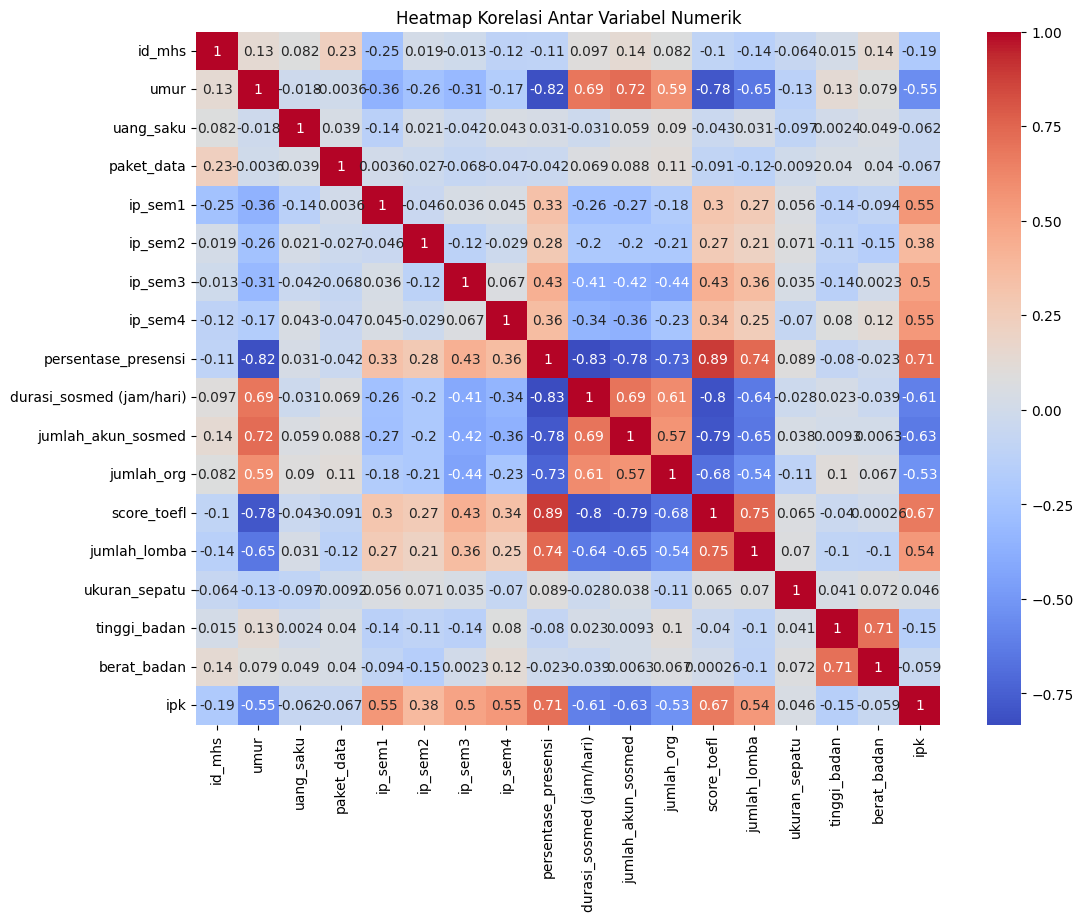

In [70]:
# Plot heatmap korelasi
plt.figure(figsize=(12,9))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

In [71]:
# Mengambil segitiga atas matriks korelasi
mask = np.triu(np.ones_like(korelasi, dtype=bool))
korelasi_matriks = korelasi.mask(mask)

In [84]:
# Mengunstack korelasi untuk mencari pasangan dengan korelasi tertinggi
korelasi_matriks_unstack = korelasi_matriks.unstack().dropna()
korelasi_matriks_unstack = korelasi_matriks_unstack.sort_values(ascending=False)

In [73]:
# Menampilkan pasangan dengan korelasi tertinggi
print("Pasangan variabel dengan korelasi tertinggi:")
print(korelasi_matriks_unstack.head())

Pasangan variabel dengan korelasi tertinggi:
persentase_presensi  score_toefl           0.892309
score_toefl          jumlah_lomba          0.746700
persentase_presensi  jumlah_lomba          0.738859
umur                 jumlah_akun_sosmed    0.724317
tinggi_badan         berat_badan           0.712921
dtype: float64


In [74]:
# Memilih pasangan dengan korelasi tertinggi
pasangan_teratas = korelasi_matriks_unstack.idxmax()
variabel_x = pasangan_teratas[0]
variabel_y = pasangan_teratas[1]
print(f"Variabel X: {variabel_x}")
print(f"Variabel Y: {variabel_y}")
print(f"Nilai Korelasi: {korelasi_matriks_unstack.max()}")

Variabel X: persentase_presensi
Variabel Y: score_toefl
Nilai Korelasi: 0.8923088914141022


In [75]:
# Menyiapkan data untuk regresi
X = df[[variabel_x]]
y = df[variabel_y]

In [76]:
# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Membuat model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_latih, y_latih)

LinearRegression()

In [78]:
# Membuat prediksi pada data uji
y_prediksi = model.predict(X_uji)

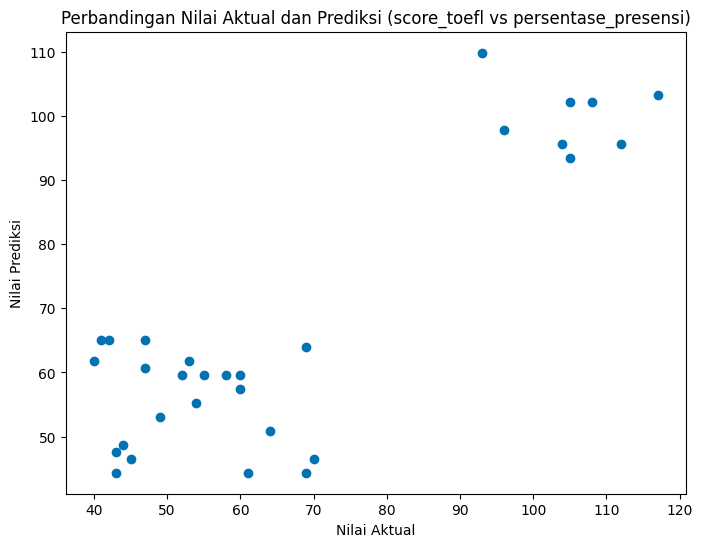

In [79]:
# Visualisasi hasil prediksi vs aktual
plt.figure(figsize=(8,6))
plt.scatter(y_uji, y_prediksi)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Perbandingan Nilai Aktual dan Prediksi ({variabel_y} vs {variabel_x})')
plt.show()

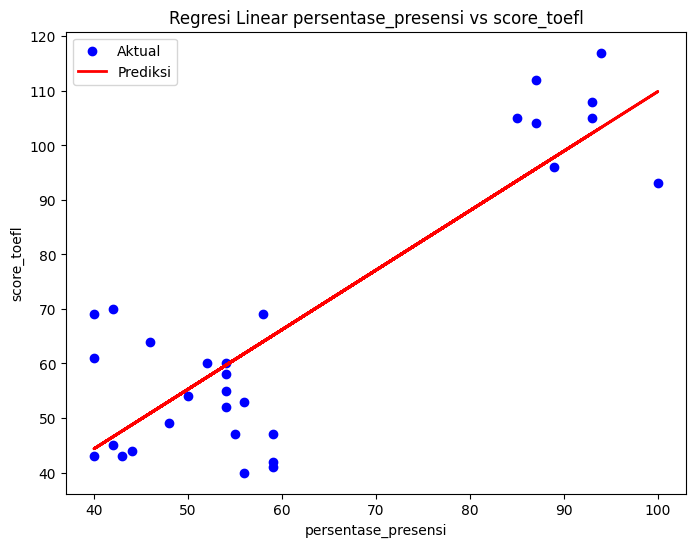

In [80]:
# Plot regresi linear
plt.figure(figsize=(8,6))
plt.scatter(X_uji, y_uji, color='blue', label='Aktual')
plt.plot(X_uji, y_prediksi, color='red', linewidth=2, label='Prediksi')
plt.xlabel(variabel_x)
plt.ylabel(variabel_y)
plt.title(f'Regresi Linear {variabel_x} vs {variabel_y}')
plt.legend()
plt.show()

In [81]:
# Menghitung metrik evaluasi
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_uji, y_prediksi)
r2 = r2_score(y_uji, y_prediksi)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Koefisien Determinasi (R-squared): {r2}")

Mean Squared Error (MSE): 165.22092007059203
Koefisien Determinasi (R-squared): 0.7287527488607656
